# 1. Import Library

In [485]:
import numpy
import pandas as pd
from sklearn import preprocessing
numpy.random.seed(10)

# 数据准备

In [486]:
all_df = pd.read_excel("data/titanic3.xls")

In [487]:
cols=['survived','name','pclass' ,'sex', 'age', 'sibsp',
      'parch', 'fare', 'embarked']
all_df=all_df[cols]

In [488]:
msk = numpy.random.rand(len(all_df)) < 0.8
train_df = all_df[msk]
test_df = all_df[~msk]

In [489]:
print('total:',len(all_df),
      'train:',len(train_df),
      'test:',len(test_df))

total: 1309 train: 1034 test: 275


In [490]:
def PreprocessData(raw_df):
    df=raw_df.drop(['name'], axis=1)
    age_mean = df['age'].mean()
    df['age'] = df['age'].fillna(age_mean)
    fare_mean = df['fare'].mean()
    df['fare'] = df['fare'].fillna(fare_mean)
    df['sex']= df['sex'].map({'female':0, 'male': 1}).astype(int)
    x_One_Hot_df = pd.get_dummies(data=df,columns=["embarked" ])

    ndarray = x_One_Hot_df.values
    Features = ndarray[:,1:]
    Label = ndarray[:,0]

    minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))
    scaledFeatures=minmax_scale.fit_transform(Features)    
    
    return scaledFeatures,Label

In [491]:
train_Features,train_Label=PreprocessData(train_df)
test_Features,test_Label=PreprocessData(test_df)

# 3. Create Model 

In [492]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras import optimizers

In [493]:
model = Sequential()

In [494]:
model.add(Dense(units=32, input_dim=9, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=1, activation='sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_49 (Dense)             (None, 32)                320       
_________________________________________________________________
dropout_31 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_50 (Dense)             (None, 32)                1056      
_________________________________________________________________
dropout_32 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_51 (Dense)             (None, 1)                 33        
Total params: 1,409
Trainable params: 1,409
Non-trainable params: 0
_________________________________________________________________


In [495]:
adam = optimizers.SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False)

# 4. Train model

In [496]:
model.compile(loss='binary_crossentropy', 
              optimizer='Adagrad', metrics=['accuracy'])

In [532]:
train_history =model.fit(x=train_Features, 
                         y=train_Label, 
                         validation_split=0.2, 
                         epochs=20, 
                         batch_size=100,verbose=2)

Train on 827 samples, validate on 207 samples
Epoch 1/20
 - 0s - loss: 0.4738 - acc: 0.7787 - val_loss: 0.4703 - val_acc: 0.7488
Epoch 2/20
 - 0s - loss: 0.4759 - acc: 0.7969 - val_loss: 0.4699 - val_acc: 0.7536
Epoch 3/20
 - 0s - loss: 0.4653 - acc: 0.7981 - val_loss: 0.4703 - val_acc: 0.7488
Epoch 4/20
 - 0s - loss: 0.4679 - acc: 0.7920 - val_loss: 0.4715 - val_acc: 0.7585
Epoch 5/20
 - 0s - loss: 0.4623 - acc: 0.7811 - val_loss: 0.4715 - val_acc: 0.7585
Epoch 6/20
 - 0s - loss: 0.4619 - acc: 0.7763 - val_loss: 0.4685 - val_acc: 0.7488
Epoch 7/20
 - 0s - loss: 0.4668 - acc: 0.7872 - val_loss: 0.4674 - val_acc: 0.7536
Epoch 8/20
 - 0s - loss: 0.4705 - acc: 0.7763 - val_loss: 0.4668 - val_acc: 0.7536
Epoch 9/20
 - 0s - loss: 0.4716 - acc: 0.7811 - val_loss: 0.4687 - val_acc: 0.7536
Epoch 10/20
 - 0s - loss: 0.4657 - acc: 0.7823 - val_loss: 0.4696 - val_acc: 0.7488
Epoch 11/20
 - 0s - loss: 0.4671 - acc: 0.7799 - val_loss: 0.4690 - val_acc: 0.7585
Epoch 12/20
 - 0s - loss: 0.4752 - acc:

# 6. Print History

In [533]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

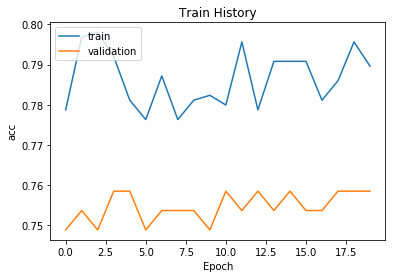

In [534]:
show_train_history(train_history,'acc','val_acc')

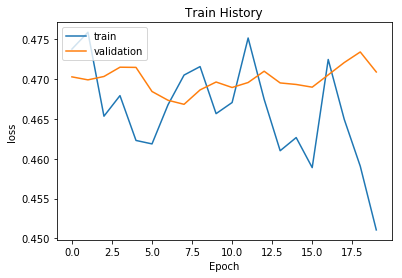

In [535]:
show_train_history(train_history,'loss','val_loss')

# 评估模型的准确率

In [536]:
scores = model.evaluate(x=test_Features, 
                        y=test_Label)

275/275 [==============================] - 0s 51us/step


In [537]:
scores[1]

0.7818181822516701

# 预测数据

# 加入Jack & Rose数据

In [503]:
Jack = pd.Series([0 ,'Jack',3, 'male'  , 23, 1, 0,  5.0000,'S'])
Rose = pd.Series([1 ,'Rose',1, 'female', 20, 1, 0, 100.0000,'S'])

In [504]:
JR_df = pd.DataFrame([list(Jack),list(Rose)],  
                  columns=['survived', 'name','pclass', 'sex', 
                   'age', 'sibsp','parch', 'fare','embarked'])

In [505]:
all_df=pd.concat([all_df,JR_df])

In [506]:
all_df[-2:]

,survived,name,pclass,sex,age,sibsp,parch,fare,embarked
0,0,Jack,3,male,23.0,1,0,5.0,S
1,1,Rose,1,female,20.0,1,0,100.0,S


# 进行预测

In [507]:
all_Features,Label=PreprocessData(all_df)

In [508]:
all_probability=model.predict(all_Features)

In [509]:
all_probability[:10]

array([[0.86527103],
       [0.4884885 ],
       [0.87231433],
       [0.40141448],
       [0.8738264 ],
       [0.28793567],
       [0.84898096],
       [0.29207855],
       [0.8456689 ],
       [0.4772026 ]], dtype=float32)

In [510]:
pd=all_df
pd.insert(len(all_df.columns),
          'probability',all_probability)

# 预测Jack & Rose数据的生存几率

In [511]:
pd[-2:]

,survived,name,pclass,sex,age,sibsp,parch,fare,embarked,probability
0,0,Jack,3,male,23.0,1,0,5.0,S,0.155445
1,1,Rose,1,female,20.0,1,0,100.0,S,0.848590


# 查看生存几率高，却没有存活

In [512]:
pd[(pd['survived']==0) &  (pd['probability']>0.9) ]

,survived,name,pclass,sex,age,sibsp,parch,fare,embarked,probability


In [513]:
pd[:5]

,survived,name,pclass,sex,age,sibsp,parch,fare,embarked,probability
0,1,"Allen, Miss. Elisabeth Walton",1,female,29.0000,0,0,211.3375,S,0.865271
1,1,"Allison, Master. Hudson Trevor",1,male,0.9167,1,2,151.5500,S,0.488488
2,0,"Allison, Miss. Helen Loraine",1,female,2.0000,1,2,151.5500,S,0.872314
3,0,"Allison, Mr. Hudson Joshua Creighton",1,male,30.0000,1,2,151.5500,S,0.401414
4,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,female,25.0000,1,2,151.5500,S,0.873826
